In [2]:
#Aikasarjaennustaminen - ei trendiä eikä kausivaihtelua
#Yksinkertainen eksponentiaalinen tasoitus sopii aikasarjoille, joissa ei ole havaittavaa trendiä tai kausivaihtelua. Eksponentiaalisen tasoituksen mallit (yksinkertainen, kaksinkertainen ja kolminkertainen) ovat erityisen suosittuja liiketaloudessa kysynnän ennustamisessa. Mallit ovat helppokäyttöisiä, nopeasti laskettavissa ja helposti päivitettävissä uusien havaintojen myötä.
#Jos ennustetaan pidemmälle kuin seuraavaan aikaleimaan, niin yksinkertainen eksoponentiaalinen tasoitus antaa kaikille tuleville aikaleimoille saman ennusteen.
#Eksponentiaalinen tasoitus löytyy statsmodels.tsa-kirjastosta.
#Huomaa, että tässä esimerkissä yksinkertainen eksoponentiaalinen tasoitus ei ole hyvä malli, koska aikasarjassa on selkeä trendi ja kausivaihtelu, jotka malli jättää huomiotta!

import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.tsa.api import ExponentialSmoothing

import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-whitegrid')
%matplotlib inline

In [3]:
df=pd.read_csv('http://taanila.fi/beer.csv')
df.index=pd.to_datetime(df['Month'],format='%Y-%m')
df=df.drop('Month',axis=1)
df.head()

,Monthly beer production
Month,
1956-01-01,93.2
1956-02-01,96.0
1956-03-01,95.2
1956-04-01,77.1
1956-05-01,70.9


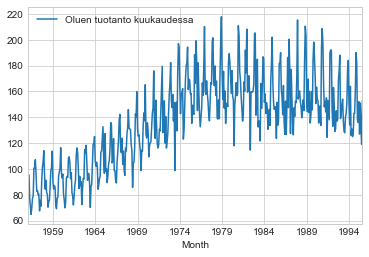

In [4]:
# Voin vaihtaa muuttujien nimiä myös rename()-toiminnolla
# Huomaa sanakirjan (dictionary) käyttö {}
df = df.rename(columns = {'Monthly beer production': 'Oluen tuotanto kuukaudessa'})
df.plot()

In [5]:
#Mallin sovitus
#Ennustemalli sovitetaan (fit()) dataan. Tuloksena saadaan olio (tässä olen antanut oliolle nimeksi malli), joka sisältää monenlaista tietoa mallista.
#freq-parametrille käytän arvoa 'MS', koska kyseessä ovat kuukauden 1. päivä. Lisätietoa freq-parametrin mahdollisista arvoista https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases
malli = ExponentialSmoothing(df['Oluen tuotanto kuukaudessa'], freq = 'MS').fit()

In [6]:
# malli-olion avulla saadaan mallin mukaan simuloidut ennusteet (fittedvalues)
df['Ennuste'] = malli.fittedvalues
df

,Oluen tuotanto kuukaudessa,Ennuste
Month,,
1956-01-01,93.2,93.203435
1956-02-01,96.0,93.201107
1956-03-01,95.2,95.097959
1956-04-01,77.1,95.167114
1956-05-01,70.9,82.922761
...,...,...
1995-04-01,127.0,148.485178
1995-05-01,151.0,133.924352
1995-06-01,130.0,145.496774


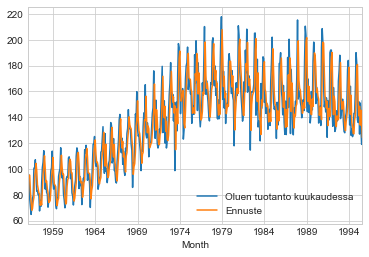

In [7]:
# Alkuperäinen aikasarja ja mallin mukaiset ennusteet samaan kaavioon
df.plot()

In [8]:
# Ennustevirheet (residuaalit) löytyvät malli-oliosta
df['Ennustevirhe'] = malli.resid
df

,Oluen tuotanto kuukaudessa,Ennuste,Ennustevirhe
Month,,,
1956-01-01,93.2,93.203435,-0.003435
1956-02-01,96.0,93.201107,2.798893
1956-03-01,95.2,95.097959,0.102041
1956-04-01,77.1,95.167114,-18.067114
1956-05-01,70.9,82.922761,-12.022761
...,...,...,...
1995-04-01,127.0,148.485178,-21.485178
1995-05-01,151.0,133.924352,17.075648
1995-06-01,130.0,145.496774,-15.496774


Text(0, 0.5, 'Ennustevirhe')

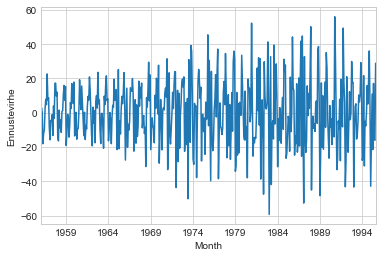

In [9]:
#Mallin tarkastelu
#Mallin hyvyyden tarkasteluun on monia tapoja. Tässä käytän
#ennustevirheiden aikasarjaa viivakaaviona
#ennusteiden ja toteutuneiden arvojen hajontakaaviota
#malliin liittyvää statistiikkaa, jonka saan summary()-toiminnolla.
#Huomaa erityisesti SSE (sum of squared errors). Mallia laskeva algoritmi yrittää saada SSE:n mahdollisimman pieneksi.
# Ennustevirheet aikasarjana
# On hyvä, jos ennustevirheiden aikasarjan vaihtelu on sattumanvaraista
df['Ennustevirhe'].plot()
plt.ylabel('Ennustevirhe')

Text(0, 0.5, 'Toteutunut kysyntä')

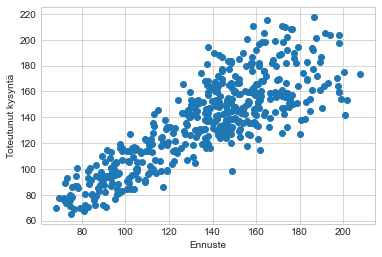

In [10]:
# Ennusteiden ja toteutuneiden kysyntöjen hajontakaavio
# Ennustemalli on sitä parempi, mitä paremmin pisteet seuraavat suoraa viivaa
# vasemmasta alakulmasta oikeaan yläkulmaan
plt.scatter(x = df['Ennuste'], y = df['Oluen tuotanto kuukaudessa'])
plt.xlabel('Ennuste')
plt.ylabel('Toteutunut kysyntä')

In [11]:
malli.summary()

Dep. Variable:,endog,No. Observations:,476
Model:,ExponentialSmoothing,SSE,169822.624
Optimized:,True,AIC,2801.496
Trend:,None,BIC,2809.827
Seasonal:,None,AICC,2801.581
Seasonal Periods:,None,Date:,"Fri, 15 Jan 2021"
Box-Cox:,False,Time:,15:53:52
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.6777149,alpha,True
initial_level,93.203435,l.0,True


In [12]:
#Ennusteiden laskeminen
#Ennustettavien ajankohtien aikaleimojen määrittämiseksi:
#Ensimmäisen ennustettavan ajankohdan aikaleiman täytyy olla aikasarjan viimeisintä aikaleimaa seuraava aikaleima.
#Ennustettavien ajankohtien lukumäärän voin määrittää periods-parametrilla.
#Ennustettavien ajankohtien frekvenssin on oltava sama kuin mallia sovitettaessa käytetty freq-parametrin arvo.
#Lisätietoa freq-parametrin mahdollisista arvoista https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases
#Tarkistan viimeisen aikaleiman
df.tail()

,Oluen tuotanto kuukaudessa,Ennuste,Ennustevirhe
Month,,,
1995-04-01,127.0,148.485178,-21.485178
1995-05-01,151.0,133.924352,17.075648
1995-06-01,130.0,145.496774,-15.496774
1995-07-01,119.0,134.994379,-15.994379
1995-08-01,153.0,124.154750,28.845250


In [13]:
# Ennustettavien ajankohtien aikaleimat (alkupäivänä aikasarjan viimeistä aikaleimaa seuraava aikaleima)
index = pd.date_range('1995-09-01', periods = 12, freq = 'MS')

# Ennusteet 12 kuukaudelle
ennusteet = malli.forecast(12)

# Ennusteet dataframeen
df_ennuste = pd.DataFrame(data = ennusteet, index = index, 
                          columns = ['Ennuste'])
df_ennuste

,Ennuste
1995-09-01,143.703606
1995-10-01,143.703606
1995-11-01,143.703606
1995-12-01,143.703606
1996-01-01,143.703606
1996-02-01,143.703606
1996-03-01,143.703606
1996-04-01,143.703606
1996-05-01,143.703606
1996-06-01,143.703606


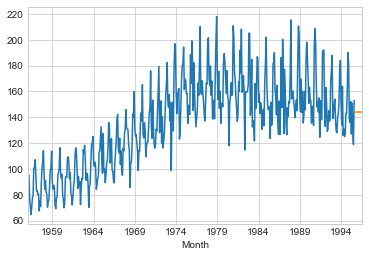

In [14]:
# Viivakaavio havainnoista
#Huomaa, että yksinkertainen eksponentiaalinen tasoitus antaa kaikille tuleville aikaleimoille saman ennusteen.
df['Oluen tuotanto kuukaudessa'].plot()

# Ennusteet kaavioon
df_ennuste['Ennuste'].plot()

In [15]:
df.head()

,Oluen tuotanto kuukaudessa,Ennuste,Ennustevirhe
Month,,,
1956-01-01,93.2,93.203435,-0.003435
1956-02-01,96.0,93.201107,2.798893
1956-03-01,95.2,95.097959,0.102041
1956-04-01,77.1,95.167114,-18.067114
1956-05-01,70.9,82.922761,-12.022761
